<a href="https://colab.research.google.com/github/MiguelAngel-ht/Plots_in_Python-/blob/main/LineColection_3D_Tech_Stock_Gains_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  BASIC LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# READ CSV AND CREATE 3 DATAFRAMES

mcsf = pd.read_csv('a5_MSFT.csv')
goog = pd.read_csv('a5_GOOGL.csv')
amzn = pd.read_csv('a5_AMZN.csv')

In [ ]:
# CALCULATE STOCK OF TECHNOLOGIES 

m = []; g = []; a = []

def stocks(i,m):
  k = i['Open'][0]
  for j in i['Open']:
    m.append(j*100/k)
  return m

m = stocks(mcsf,m)
g = stocks(goog,g)
a = stocks(amzn,a)


emp = [a,m,g]
com = ['Amazon','Microsoft','Google']    

In [ ]:
# LABELS TO PLOT

days = mcsf['Date']

pos = [k*(251/12) for k in range(12)]
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [ ]:
# LIBRARIES TO PLOT IN 3D

from matplotlib.collections import LineCollection
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d import Axes3D

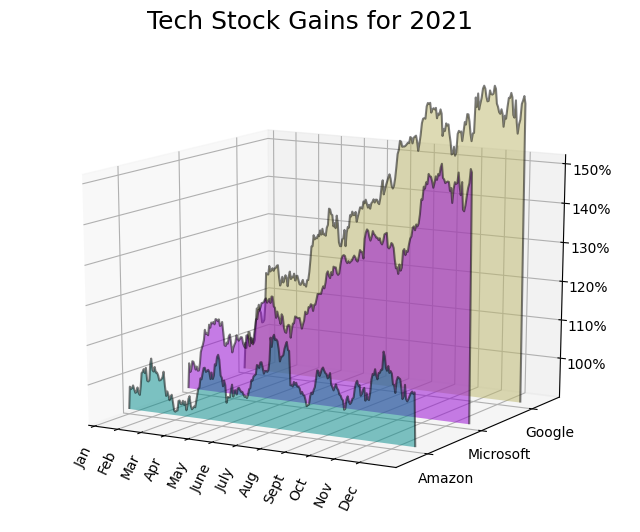

In [ ]:
# 

fig = plt.figure(figsize=[8,6],dpi=100)
ax = fig.gca(projection='3d')

# PREPARE DATA FOR LINE COLLECTION

data = []
xs = np.arange(0,251)
k=2
for i in [1,2,3]:
  ys = emp[k]
  ys[0], ys[-1] = 91, 91
  data.append(list(zip(xs, ys)))
  k -= 1
  
# 3D PLOT configuration

poly = LineCollection(data,facecolors=['darkkhaki','darkviolet','darkcyan'],color='k')
poly.set_alpha(0.5)
z=[3,2,1]


ax.add_collection3d(poly,zs = z, zdir='y')
ax.set_xlim3d(0,255)
ax.set_ylim3d(0.5,3.5)
ax.set_zlim3d(91, 151)

# Use the axis reference to modify options for x,y, and z dimensions

ax.locator_params(axis='x', nbins=12)
ax.locator_params(axis='y', nbins=len(com))
ax.locator_params(axis='z', nbins=8)

# LABELS 

plt.suptitle('Tech Stock Gains for 2021',fontsize=18)

ax.set_zticks([100,110,120,130,140,150])
ax.set_zticklabels(['100%','110%','120%','130%','140%','150%'])

ax.set_xticks(pos)
ax.set_xticklabels(lab,rotation=65)

ax.set_yticks([1,2,3])
ax.set_yticklabels(com)

ax.view_init(15)

plt.show()
